# Práctica 3 - Maldición de Dimensionalidad

Identificar la cantidad de polinomios de grado 3 que pueden generarse con 1 variable, 2 variables y 3 variables con la clase PolynomialFeatures de sklearn

In [1]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import PolynomialFeatures
import matplotlib.pyplot as plt

In [2]:
#carga de datos
dataset = np.load('dataset.npy')

variables=["SalePrice", "OverallQual", "1stFlrSF","TotRmsAbvGrd","YearBuilt","LotFrontage"]

df = pd.DataFrame(dataset, columns=variables)
df


,SalePrice,OverallQual,1stFlrSF,TotRmsAbvGrd,YearBuilt,LotFrontage
0,208500.0,7.0,856.0,8.0,2003.0,65.0
1,181500.0,6.0,1262.0,6.0,1976.0,80.0
2,223500.0,7.0,920.0,6.0,2001.0,68.0
3,140000.0,7.0,961.0,7.0,1915.0,60.0
4,250000.0,8.0,1145.0,9.0,2000.0,84.0
...,...,...,...,...,...,...
1455,175000.0,6.0,953.0,7.0,1999.0,62.0
1456,210000.0,6.0,2073.0,7.0,1978.0,85.0
1457,266500.0,7.0,1188.0,9.0,1941.0,66.0
1458,142125.0,5.0,1078.0,5.0,1950.0,68.0


### Polinomios vs cantidad de variables

Para este ejercicio generaremos los polinomios de las variables incluyendo el bias de las dimensiones generadas por sklearn. Debido a que el dataset utilizado para este ejercicio contiene más de 3 variables, se realizará el análisis con 5 variables para poder apreciar de mejor manera el incremento de dimensionalidades.

Este procedimiento se realizá para polinomios de grado 1,2 y 3.

1 variable: 2 polinomios
2 variable: 3 polinomios
3 variable: 4 polinomios
4 variable: 5 polinomios
5 variable: 6 polinomios


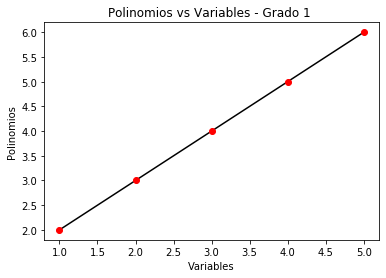

1 variable: 3 polinomios
2 variable: 6 polinomios
3 variable: 10 polinomios
4 variable: 15 polinomios
5 variable: 21 polinomios


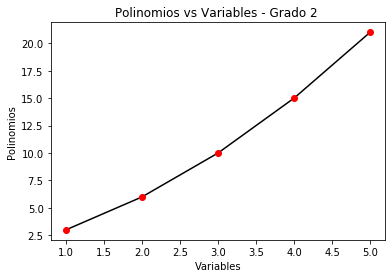

1 variable: 4 polinomios
2 variable: 10 polinomios
3 variable: 20 polinomios
4 variable: 35 polinomios
5 variable: 56 polinomios


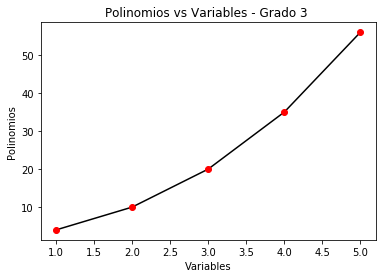

In [3]:
vars_limit = 6

for degree in range(1,4):
    dimensions = list()
    for i in range(1,vars_limit): 
        poly_features = PolynomialFeatures(degree=degree)
        transformed_data = poly_features.fit_transform(dataset[:,0:i])
        dimensions.append(transformed_data.shape[1])
        print(str(i)+" variable: "+str(transformed_data.shape[1])+" polinomios")

    plt.plot(range(1,vars_limit), dimensions, 'k' , range(1,vars_limit), dimensions,'ro' )
    plt.xlabel("Variables")
    plt.ylabel("Polinomios")
    plt.title("Polinomios vs Variables - Grado %s " %(degree))
    plt.show()

## Conclusiones

- La maldición de la dimensionalidad, indica que mientras más dimensiones tenemos, la complejidad de un problema crece exponencialmente ya que al haber más dimensiones, necesitamos más datos para poder cubrir más regiones.


- Como se puede apreciar en las gráficsa, la cantidad de polinomios que pueden generarse crece de manera exponencial a partir del grado 2 conforme agregamos más variables.